In [219]:
from bigraph_viz import plot_bigraph, replace_regex_recursive

dpi = '70'
save = False

tx = {
    'transcription': {
        '_type': 'process',
        'inputs': {
            'DNA': ['DNA (mg/ml)'],
        },
        'outputs': {
            'mRNA': ['mRNA (mg/ml)'],
        }
    }
}

stoch_tx = {
    'stochastic transcription': {
        '_type': 'process',
        'inputs': {
            'DNA': ['DNA (counts)'],
        },
        'outputs': {
            'mRNA': ['mRNA (counts)'],
        }
    }
}

tl = {
    'translation': {
        '_type': 'process',
        'inputs': {
            'mRNA': ['mRNA (mg/ml)'],
        },
        'outputs': {
            'protein': ['protein (mg/ml)'],
        }
    }
}

counts_concs = {
    'counts to mg/ml': {
        '_type': 'process',
        'inputs': {
            'counts': ['mRNA (counts)'],
            'volume': ['volume'],
        },
        'outputs': {
            'mg/ml': ['mRNA (mg/ml)'],
        }
    },
}

multibody = {
    'multibody physics': {
        '_type': 'process',
        'inputs': {
            'cells': ['cells'],
        },
        'outputs': {
            'cells': ['cells'],
        }
    },
}

diffusion = {
    'diffusion': {
        '_type': 'process',
        'inputs': {
            'cells': ['cells'],
            'fields': ['fields'],
            'dimensions': ['dimensions'],
        },
        'outputs': {
            'cells': ['cells'],
            'fields': ['fields'],
            'dimensions': ['dimensions'],
        }
    },
}


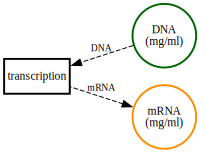

In [220]:
tx_composite = {
    **tx,
}

plot_settings= {
    'rankdir': 'RL',
    'node_border_colors': {
        ('DNA<br/>(mg/ml)',): 'darkgreen',
        ('mRNA<br/>(mg/ml)',): 'darkorange',
        # ('protein',): 'darkslateblue',
    }
}
plot_bigraph(
    replace_regex_recursive(tx_composite),
    **plot_settings,
    filename='tx_composite' if save else None,
    dpi=dpi,
    )

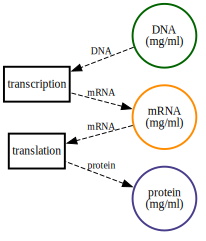

In [221]:
txtl_composite = {
    **tx,
    **tl
}

plot_settings= {
    'rankdir': 'RL',
    'node_border_colors': {
        ('DNA<br/>(mg/ml)',): 'darkgreen',
        ('mRNA<br/>(mg/ml)',): 'darkorange',
        ('protein<br/>(mg/ml)',): 'darkslateblue',
    }
}
plot_bigraph(
    replace_regex_recursive(txtl_composite),
    **plot_settings,
    filename='txtl_composite' if save else None,
    dpi=dpi,
    )

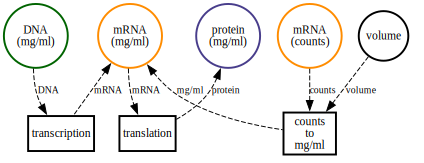

In [222]:
stochastic_txtl_composite = {
    **tx,
    **counts_concs,
    **tl,
}

plot_settings= {
    'rankdir': 'TD',
    'node_border_colors': {
        ('DNA<br/>(mg/ml)',): 'darkgreen',
        ('mRNA<br/>(mg/ml)',): 'darkorange',
        ('mRNA<br/>(counts)',): 'darkorange',
        ('protein<br/>(mg/ml)',): 'darkslateblue',
    }
}
plot_bigraph(
    replace_regex_recursive(stochastic_txtl_composite),
    **plot_settings,
    filename='stochastic_txtl_composite' if save else None,
    dpi=dpi,
    )

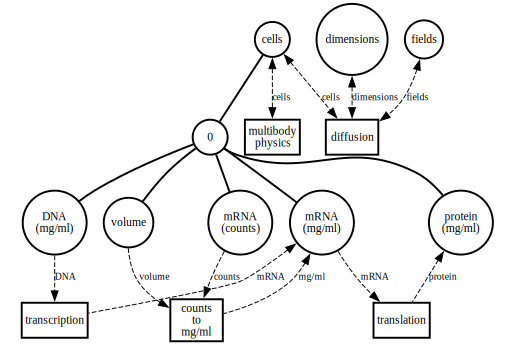

In [223]:
nested_single_cell = {
    'cells': {
        '0': stochastic_txtl_composite
    },
    **multibody,
    **diffusion
}

plot_settings= {
    'rankdir': 'TD',
    'remove_process_place_edges': True,
}
plot_bigraph(
    replace_regex_recursive(nested_single_cell),
    **plot_settings,
    filename='nested_single_cell' if save else None,
    dpi=dpi,
    )

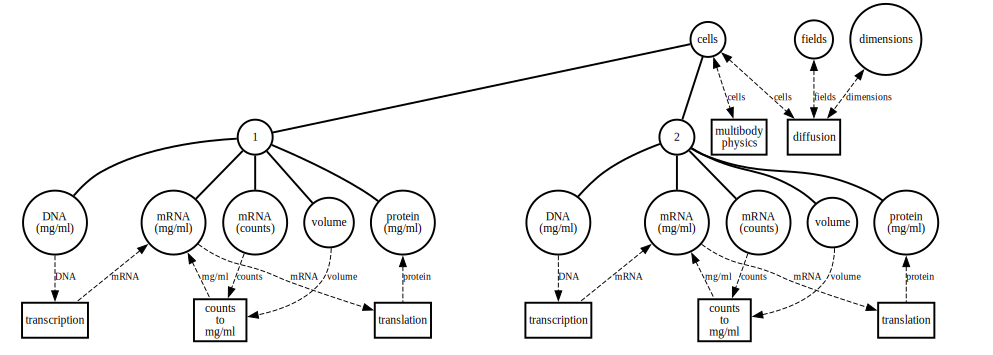

In [224]:
nested_two_cell = {
    'cells': {
        '1': stochastic_txtl_composite,
        '2': stochastic_txtl_composite,
    },
    **multibody,
    **diffusion
}

plot_settings= {
    'rankdir': 'TD',
    'remove_process_place_edges': True,
}
plot_bigraph(
    replace_regex_recursive(nested_two_cell),
    **plot_settings,
    filename='nested_two_cell' if save else None,
    dpi=dpi,
    )

## Cell hierarchy

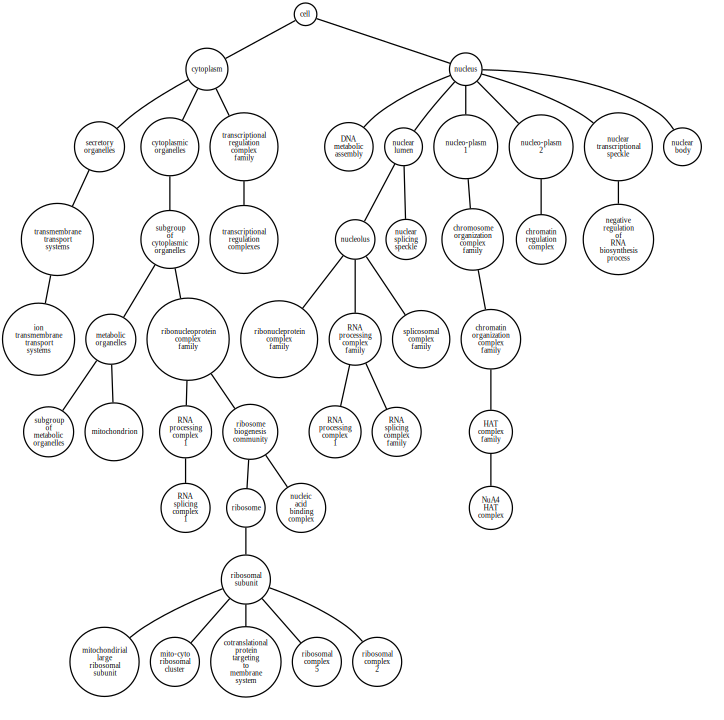

In [225]:
music_map = {
    'cell': {
        'cytoplasm': {
            'secretory organelles': {
                'transmembrane transport systems': {
                    'ion transmembrane transport systems': {}}},
            'cytoplasmic organelles': {
                'subgroup of cytoplasmic organelles': {
                    'metabolic organelles': {
                        'subgroup of metabolic organelles': {},
                        'mitochondrion': {}},
                    'ribonucleoprotein complex family': {
                        'RNA processing complex 1': {'RNA splicing complex 1': {}},
                        'ribosome biogenesis community': {
                            'ribosome': {
                                'ribosomal subunit': {
                                    'mitochondirial large ribosomal subunit': {
                                        # 'large ribosomal subunit subcomplex 1': {}
                                    },
                                    'mito-cyto ribosomal cluster': {},
                                    'cotranslational protein targeting to membrane system': {},
                                    'ribosomal complex 5': {},
                                    'ribosomal complex 2': {}}},
                            'nucleic acid binding complex': {}}}}},
            'transcriptional regulation complex family': {
                'transcriptional regulation complexes': {}}},
        'nucleus': {
            'DNA metabolic assembly': {},
            'nuclear lumen': {
                'nucleolus': {
                    'ribonucleprotein complex family': {},
                    'RNA processing complex family': {
                        'RNA processing complex 1': {},
                        'RNA splicing complex family': {}},
                    'splicosomal complex family': {}},
                'nuclear splicing speckle': {}},
            'nuclear body': {},
            'nucleo-plasm 1': {
                'chromosome organization complex family': {
                    'chromatin organization complex family': {
                        'HAT complex family': {
                            'NuA4 HAT complex': {}}}}},
            'nucleo-plasm 2': {
                'chromatin regulation complex': {}},
            'nuclear transcriptional speckle': {
                'negative regulation of RNA biosynthesis process': {}}}}}
music_map1 = replace_regex_recursive(music_map)
plot_bigraph(music_map1, 
             filename='cell_hierarchy' if save else None,
             dpi=dpi,
             )

## Cell hierarchy with functions

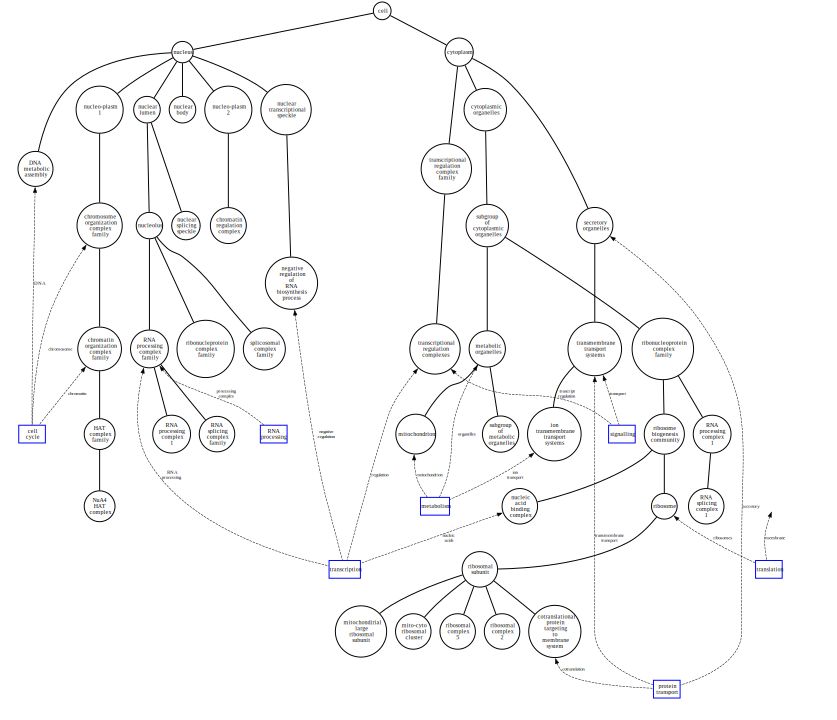

In [226]:
import copy

transcription_process = {
    '_type': 'process',
    '_outputs': {
        'RNA processing': 'any',
        'regulation': 'any',
        'nucleic acids': 'any',
        'negative regulation': 'any'
    },
    'outputs': {
        'RNA processing': [
            'nucleus', 'nuclear lumen', 'nucleolus', 'RNA processing complex family'],
        'regulation': [
            'cytoplasm', 'transcriptional regulation complex family', 'transcriptional regulation complexes'],
        'nucleic acids': [
            'cytoplasm', 'cytoplasmic organelles', 'subgroup of cytoplasmic organelles', 
            'ribonucleoprotein complex family', 'ribosome biogenesis community', 'nucleic acid binding complex'],
        'negative regulation': [
            'nucleus', 'nuclear transcriptional speckle', 'negative regulation of RNA biosynthesis process'],
    }
}

translation_process = {
    '_type': 'process',
    '_outputs': {
        'ribosomes': 'any',
        'membrane': 'any'
    },
    'outputs': {
        'ribosomes': [
            'cytoplasm', 'cytoplasmic organelles', 'subgroup of cytoplasmic organelles', 'ribonucleoprotein complex family', 'ribosome biogenesis community', 'ribosome'],
        # 'membrane': ['],
    }
}

metabolism_process = {
    '_type': 'process',
    '_outputs': {
        'organelles': 'any',
        'mitochondrion': 'any',
        'ion transport': 'any',
    },
    'outputs': {
        'organelles': [
            'cytoplasm', 'cytoplasmic organelles', 'subgroup of cytoplasmic organelles', 'metabolic organelles', ],
        'mitochondrion': [
            'cytoplasm', 'cytoplasmic organelles', 'subgroup of cytoplasmic organelles', 'metabolic organelles', 'mitochondrion'],
        'ion transport': [
            'cytoplasm', 'secretory organelles', 'transmembrane transport systems', 'ion transmembrane transport systems'],
    }
}

cell_cycle_process = {
    '_type': 'process',
    '_outputs': {
        'DNA': 'any',
        'chromosome': 'any',
        'chromatin': 'any',
    },
    'outputs': {        
        'DNA': ['nucleus', 'DNA metabolic assembly'],
        'chromosome': ['nucleus', 'nucleo-plasm 1', 'chromosome organization complex family',],
        'chromatin': ['nucleus', 'nucleo-plasm 1', 'chromosome organization complex family', 'chromatin organization complex family'],
    }
}

signalling_process = {
    '_type': 'process',
    '_outputs': {
        'transport': 'any',
        'trancript regulation': 'any',
    },
    'outputs': {        
        'transport': [
            'cytoplasm', 'secretory organelles', 'transmembrane transport systems'],
        'trancript regulation': [
            'cytoplasm', 'transcriptional regulation complex family', 'transcriptional regulation complexes'],
    }
}

protein_transport_process = {
    '_type': 'process',
    '_outputs': {
        'transmembrane transport': 'any',
        'secretory': 'any',
        'cotranslation': 'any',
    },
    'outputs': {        
        'transmembrane transport': [
            'cytoplasm', 'secretory organelles', 'transmembrane transport systems'],
        'secretory': [
            'cytoplasm', 'secretory organelles'],
        'cotranslation': [
            'cytoplasm', 'cytoplasmic organelles', 'subgroup of cytoplasmic organelles', 'ribonucleoprotein complex family', 
            'ribosome biogenesis community', 'ribosome', 'ribosomal subunit', 'cotranslational protein targeting to membrane system']
    }
}

rna_processing_process = {
    '_type': 'process',
    '_outputs': {
        'processing complex': 'any',
    },
    'outputs': {        
        'processing complex': [
            'nucleus', 'nuclear lumen', 'nucleolus', 'RNA processing complex family'],
    }
}

# compose schema
music_map['cell']['transcription'] = transcription_process
music_map['cell']['translation'] = translation_process
music_map['cell']['metabolism'] = metabolism_process
music_map['cell']['cell cycle'] = cell_cycle_process
music_map['cell']['signalling'] = signalling_process
music_map['cell']['protein transport'] = protein_transport_process
music_map['cell']['RNA processing'] = rna_processing_process

music_map2 = replace_regex_recursive(music_map)

# plot
plot_settingsx = copy.deepcopy(plot_settings)
plot_settingsx['label_margin'] = '0.02'
plot_settingsx['node_border_colors'] = {
    ('cell', 'translation'): 'blue',
    ('cell', 'transcription'): 'blue',
    ('cell', 'metabolism'): 'blue',
    ('cell', 'cell<br/>cycle'): 'blue',
    ('cell', 'signalling'): 'blue',
    ('cell', 'protein<br/>transport'): 'blue',
    ('cell', 'RNA<br/>processing'): 'blue',
}
plot_settingsx['remove_process_place_edges'] = True
plot_bigraph(music_map2, 
             filename='cell_hierarchy_functions' if save else None,
             **plot_settingsx,
             dpi=dpi,
             )